# Fake news classifier


***In this notebook, we're about to build a robust classifier with the purpose of identifying fake news. The two datatsets used to build the classifier are taken from Kaggle : https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset. Work will also be split in two notebooks : this one will analyze the data and gather some useful insight, the second one will be for experimenting with different models.***

To start off, let's import some of the libraries we're going to need, then take a look at our data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
true_dataset = pd.read_csv('news/True.csv')
fake_dataset = pd.read_csv('news/Fake.csv')

In [3]:
true_dataset

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake_dataset

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


***First and foremost, we can observe the following :***
1.  Both datasets are relatively similar in size  
2.  Both contain same four features(title, text, subject, date)

In [5]:
true_dataset.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
fake_dataset.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

No missing values in both datasets!

In [7]:
true_dataset['subject'].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [8]:
fake_dataset['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

We will now proceed to merge both datasets, as well as editing them, to an extent. A column denoting whether or not the article is fake is also required. Let's now do all of that.

In [9]:
true_dataset['is_fake'] = 0
fake_dataset['is_fake'] = 1

data = pd.concat([true_dataset, fake_dataset])
data = data.reset_index()
data = data.sample(frac = 1)

In [10]:
data

,index,title,text,subject,date,is_fake
13873,13873,Death toll in Egypt mosque attack rises to 305...,CAIRO (Reuters) - The death toll in a devastat...,worldnews,"November 25, 2017",0
7929,7929,"Trump calls tax avoidance 'smart,' most Americ...",NEW YORK (Reuters) - Republican presidential n...,politicsNews,"October 4, 2016",0
31450,10033,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,politics,"Aug 27, 2017",1
21653,236,Trump EXPLODES In Twitter Tantrum That Proves...,Donald Trump threw a massive hissy fit over ju...,News,"October 10, 2017",1
16477,16477,U.S. House passes sanctions on Iran-backed Hez...,WASHINGTON (Reuters) - The U.S. House of Repre...,worldnews,"October 25, 2017",0
...,...,...,...,...,...,...
4091,4091,Senate Republican leader says still aiming for...,WASHINGTON (Reuters) - The top Republican in t...,politicsNews,"April 25, 2017",0
35774,14357,DON’T LET HILLARY HIJACK THE FLINT WATER CRISI...,Hillary Clinton came to visit the citizens of ...,politics,"Mar 6, 2016",1
861,861,Republican tax bill seeks elimination of some ...,CHICAGO (Reuters) - The U.S. House Republican ...,politicsNews,"November 2, 2017",0
5016,5016,Canada says most border-crossing asylum seeker...,OTTAWA (Reuters) - Most of the people crossing...,politicsNews,"March 10, 2017",0


In [11]:
data.duplicated().sum()

0

For this project, I will be dropping both the subject and date columns, as I believe an accurate model could be built without them.

In [12]:
data = data.drop(['subject', 'date'], axis = 1)
data

,index,title,text,is_fake
13873,13873,Death toll in Egypt mosque attack rises to 305...,CAIRO (Reuters) - The death toll in a devastat...,0
7929,7929,"Trump calls tax avoidance 'smart,' most Americ...",NEW YORK (Reuters) - Republican presidential n...,0
31450,10033,"DEMOCRATS CONVENIENTLY FORGET 6,000 Prisoners ...",Democrats are calling for President Trump s sc...,1
21653,236,Trump EXPLODES In Twitter Tantrum That Proves...,Donald Trump threw a massive hissy fit over ju...,1
16477,16477,U.S. House passes sanctions on Iran-backed Hez...,WASHINGTON (Reuters) - The U.S. House of Repre...,0
...,...,...,...,...
4091,4091,Senate Republican leader says still aiming for...,WASHINGTON (Reuters) - The top Republican in t...,0
35774,14357,DON’T LET HILLARY HIJACK THE FLINT WATER CRISI...,Hillary Clinton came to visit the citizens of ...,1
861,861,Republican tax bill seeks elimination of some ...,CHICAGO (Reuters) - The U.S. House Republican ...,0
5016,5016,Canada says most border-crossing asylum seeker...,OTTAWA (Reuters) - Most of the people crossing...,0


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 42)
X_train = train.drop('is_fake', axis = 1)
y_train = train['is_fake']
X_test = test.drop('is_fake', axis = 1)
y_test = test['is_fake']

In [14]:
y_train.value_counts()

1    18788
0    17130
Name: is_fake, dtype: int64

In [15]:
y_test.value_counts()

1    4693
0    4287
Name: is_fake, dtype: int64

In [16]:
train_true = X_train.loc[(y_train == 0), :]
train_fake = X_train.loc[(y_train == 1), :]

***Now, we're about to engineer a several features on our own, which will hopefully aid us in our task to correctly classify fake news.***

## Lexical Diversity of Fake News
Let's define a measure for lexical diversity to find out how many unique vocabs are used in fake news articles.

Let's define the lexical diversity measure as $\frac{\text{number of unique words in one (target)category}}{\text{number of words in both (target)categories}}$

In [17]:
import string

def lexical_diversity(data, extra, feature): # Function for calculating the aforementioned measure
    
    # Getting all the words
    col = data[feature].str.lower()
    text = ''.join(col) # Merge all articles into one big text
    exclude = set(string.punctuation) # Create set of excluded characters
    words = ''.join(char for char in text if char not in exclude) 
    split_words = words.split()
    
    # Analogously
    extra_col = data[feature].str.lower()
    extra_text = ''.join(extra_col)
    extra_exclude = set(string.punctuation)
    extra_words = ''.join(char for char in extra_text if char not in extra_exclude)
    extra_split_words = extra_words.split()
    
    return len(set(split_words)) / (len(split_words) + len(extra_split_words))

print('Lexical diversity of true news: %.5f' % lexical_diversity(train_true, train_fake, 'text'))
print('Lexical diversity of fake news: %.5f' % lexical_diversity(train_fake, train_true, 'text'))

Lexical diversity of true news: 0.00697
Lexical diversity of fake news: 0.01100


And interestingly enough, there is in fact a significant difference in the unique vocabulary used in both types of news.

## Punctuation

Punctuation might play a big role in determining the autheticity of the articles. Things like question and exclamation marks, commas, stops are likely to be prevalent in one of the types of data. The investigation will commence in the following code cells.


In [18]:
import regex as re

# Helper function
def count_punctuation(text):
    
    peri = re.subn(r'\.', '', text)[1]
    comm = re.subn(r'\,', '', text)[1]
    ques = re.subn(r'\?', '', text)[1]
    excl = re.subn(r'\!', '', text)[1]
    
    return [peri, comm, ques, excl]

def get_punct_dataframe(dataset, feature):
    return dataset.apply(lambda row: pd.Series({'peri_' + feature:count_punctuation(row[feature])[0],
                                                'comm_' + feature:count_punctuation(row[feature])[1],
                                                'ques_' + feature:count_punctuation(row[feature])[2],
                                                'excl_' + feature:count_punctuation(row[feature])[3]}), axis = 1)

punctuation_train_title = get_punct_dataframe(train, 'title')
punctuation_test_title = get_punct_dataframe(test, 'title')
punctuation_train_text = get_punct_dataframe(train, 'text')
punctuation_test_text = get_punct_dataframe(test, 'text')

In [19]:
punctuation_train_text

,peri_text,comm_text,ques_text,excl_text
8445,41,48,1,0
29209,20,11,0,0
14333,28,15,0,0
21922,7,24,0,0
27693,32,32,6,0
...,...,...,...,...
27622,30,16,0,1
6603,2,7,0,0
3097,7,2,0,0
13907,4,4,0,0


## Text and title length

In [20]:
def create_len_dataframe(dataset):
    return dataset.apply(lambda row: pd.Series({'title_length': len(row['title']), 
                                                'text_length': len(row['text'])}), axis = 1)

train_len = create_len_dataframe(train)
test_len = create_len_dataframe(test)

In [21]:
train_len

,title_length,text_length
8445,66,5193
29209,72,2018
14333,64,2027
21922,69,1974
27693,94,3336
...,...,...
27622,69,2926
6603,74,280
3097,53,641
13907,62,594


## Number of words in the title

In [22]:
def count_title_words(dataset):
    return dataset.apply(lambda row: pd.Series({'title_words': len(row['title'].split())}), axis = 1)

train_title_words = count_title_words(train)
test_title_words = count_title_words(test)

In [23]:
train_title_words

,title_words
8445,10
29209,11
14333,10
21922,11
27693,15
...,...
27622,9
6603,10
3097,8
13907,10


***We're just about done engineering our features. Now let us concatenate them into a single dataset***

In [24]:
X_train = pd.concat([punctuation_train_title,
                     punctuation_train_text,
                     train_len,
                     train_title_words], axis = 1)

X_test = pd.concat([punctuation_test_title,
                    punctuation_test_text,
                    test_len,
                    test_title_words], axis = 1)

In [25]:
X_train

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
8445,0,2,0,0,41,48,1,0,66,5193,10
29209,0,0,0,0,20,11,0,0,72,2018,11
14333,2,1,0,0,28,15,0,0,64,2027,10
21922,0,0,0,0,7,24,0,0,69,1974,11
27693,2,0,0,0,32,32,6,0,94,3336,15
...,...,...,...,...,...,...,...,...,...,...,...
27622,0,0,0,0,30,16,0,1,69,2926,9
6603,1,0,0,0,2,7,0,0,74,280,10
3097,2,0,0,0,7,2,0,0,53,641,8
13907,0,0,0,0,4,4,0,0,62,594,10


In [26]:
X_train.describe()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,title_length,text_length,title_words
count,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000
mean,0.271340,0.226098,0.042040,0.081018,20.967899,20.229885,0.684531,0.413358,80.164876,2471.090901,12.465895
std,0.698889,0.499822,0.212411,0.302482,18.382274,20.203373,1.842207,1.504898,25.538673,2157.715811,4.133050
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,0.000000,0.000000,63.000000,1242.000000,10.000000
50%,0.000000,0.000000,0.000000,0.000000,18.000000,17.000000,0.000000,0.000000,73.000000,2187.000000,11.000000
75%,0.000000,0.000000,0.000000,0.000000,27.000000,26.000000,1.000000,0.000000,91.000000,3108.750000,14.000000
max,6.000000,5.000000,3.000000,4.000000,555.000000,518.000000,94.000000,133.000000,286.000000,51794.000000,42.000000


### We can observe the following :
1. Many titles don't contain any form of punctuation
2. Some articles are suspiciously small - there's at least one containing just 1 character
3. The standard deviation for the 'text_length' column is huge - we can expect all sorts of article lengths

array([[<AxesSubplot:title={'center':'peri_title'}>,
        <AxesSubplot:title={'center':'comm_title'}>],
       [<AxesSubplot:title={'center':'ques_title'}>,
        <AxesSubplot:title={'center':'excl_title'}>]], dtype=object)

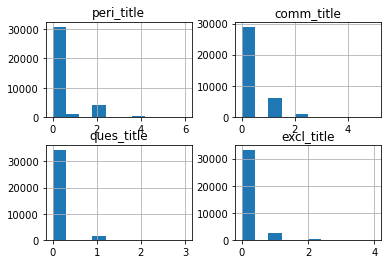

In [27]:
X_train.hist(column = ['peri_title', 'comm_title', 'ques_title', 'excl_title'])

array([[<AxesSubplot:title={'center':'peri_text'}>,
        <AxesSubplot:title={'center':'comm_text'}>],
       [<AxesSubplot:title={'center':'ques_text'}>,
        <AxesSubplot:title={'center':'excl_text'}>]], dtype=object)

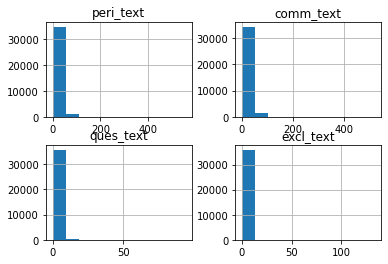

In [28]:
X_train.hist(column = ['peri_text', 'comm_text', 'ques_text', 'excl_text'])

array([[<AxesSubplot:title={'center':'title_length'}>,
        <AxesSubplot:title={'center':'text_length'}>],
       [<AxesSubplot:title={'center':'title_words'}>, <AxesSubplot:>]],
      dtype=object)

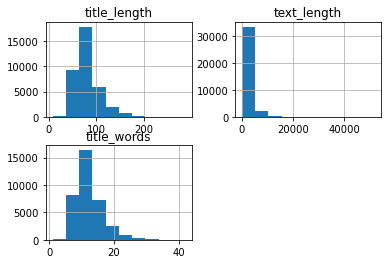

In [29]:
X_train.hist(column = ['title_length', 'text_length', 'title_words'])

***We're done with the EDA and feature engineering. In the following notebook, we're going to test several different classification methods and measure their performance.***